**Import the Important Library**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

**Split the data into train and test**

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
#Check the shape of X_test'
X_test.shape

(10000, 28, 28)

In [4]:
#Check the shape of X_test'
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

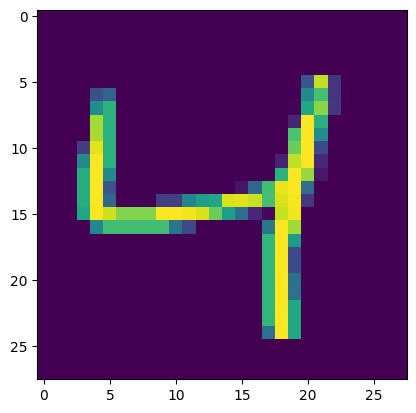

In [5]:
#Plot the digital number using matplotlib
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

**Normalization**

In [6]:
#Range of value now ranges from 0 to 1
X_train = X_train/255
X_test = X_test/255

**Model Creation**

In [7]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [9]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [10]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 25s 5ms/step - loss: 0.2509 - accuracy: 0.9243 - val_loss: 0.0950 - val_accuracy: 0.9716
Epoch 2/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1045 - accuracy: 0.9686 - val_loss: 0.0754 - val_accuracy: 0.9778
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0741 - accuracy: 0.9770 - val_loss: 0.0660 - val_accuracy: 0.9819
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0586 - accuracy: 0.9812 - val_loss: 0.0598 - val_accuracy: 0.9833
Epoch 5/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0475 - accuracy: 0.9847 - val_loss: 0.0641 - val_accuracy: 0.9834
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0380 - accuracy: 0.9878 - val_loss: 0.0656 - val_accuracy: 0.9838
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0351 - accuracy: 0.9883 - val_loss: 0.0630 - val_accuracy

In [11]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [12]:
y_pred = y_prob.argmax(axis=1)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.986

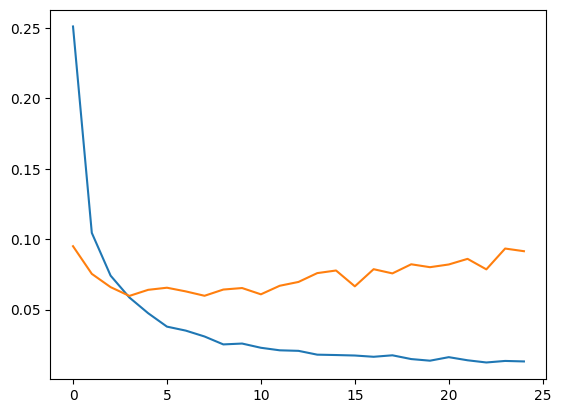

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

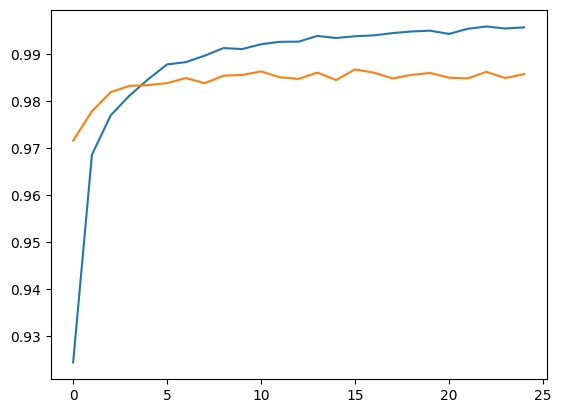

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

**Testing the model**

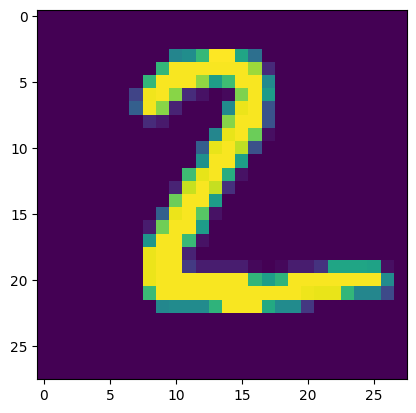

In [16]:
plt.imshow(X_test[1])

In [17]:
y_predicted = model.predict(X_test)
print("Predicted output :  ",np.argmax(y_predicted[1]))

313/313 [==============================] - 1s 2ms/step
Predicted output :   2


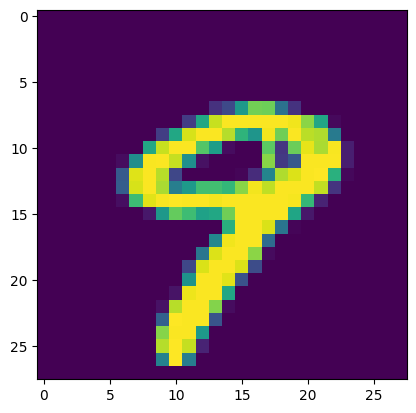

In [18]:
plt.imshow(X_test[9])

In [19]:
y_predicted = model.predict(X_test)
print("Predicted output :  ",np.argmax(y_predicted[9]))

313/313 [==============================] - 1s 2ms/step
Predicted output :   9


**Checking wrong predicted count:**

In [20]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    1,    1,    0,    0,    0,    2,    1,    0,    0],
       [   0, 1128,    2,    3,    0,    0,    2,    0,    0,    0],
       [   1,    0, 1015,    0,    1,    0,    3,   10,    1,    1],
       [   1,    0,    3,  998,    0,    3,    0,    3,    2,    0],
       [   0,    0,    0,    0,  969,    0,    0,    1,    0,   12],
       [   3,    0,    0,    8,    0,  875,    4,    0,    1,    1],
       [   4,    2,    1,    0,    2,    1,  948,    0,    0,    0],
       [   1,    1,    8,    1,    1,    0,    0, 1013,    1,    2],
       [   3,    1,    3,    3,    1,    0,    3,    3,  951,    6],
       [   2,    0,    1,    5,    3,    1,    0,    8,    1,  988]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

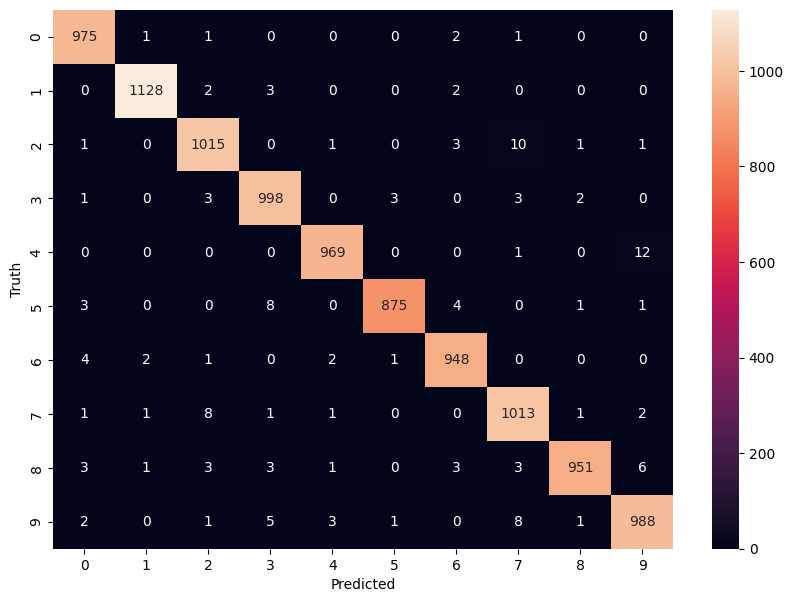

In [21]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

 - Model is working very fine and accuracy is 98% which is very good accuracy